In [32]:
import numpy as np
import matplotlib.pyplot as plt


img = plt.imread("kodim23.png")

In [33]:
img

array([[[0.45490196, 0.45490196, 0.34509805],
        [0.45882353, 0.45882353, 0.34901962],
        [0.47058824, 0.47058824, 0.36078432],
        ...,
        [0.18039216, 0.15686275, 0.11372549],
        [0.18039216, 0.15686275, 0.11372549],
        [0.18431373, 0.16078432, 0.12156863]],

       [[0.47843137, 0.46666667, 0.36078432],
        [0.47843137, 0.46666667, 0.36078432],
        [0.48235294, 0.47058824, 0.3647059 ],
        ...,
        [0.18431373, 0.16078432, 0.12156863],
        [0.18431373, 0.16078432, 0.12156863],
        [0.18039216, 0.15686275, 0.11372549]],

       [[0.49411765, 0.48235294, 0.36862746],
        [0.49411765, 0.48235294, 0.36862746],
        [0.49803922, 0.4862745 , 0.37254903],
        ...,
        [0.18431373, 0.16078432, 0.12156863],
        [0.18039216, 0.15686275, 0.11372549],
        [0.18039216, 0.15686275, 0.11372549]],

       ...,

       [[0.23921569, 0.33333334, 0.1254902 ],
        [0.24313726, 0.3372549 , 0.12941177],
        [0.25490198, 0

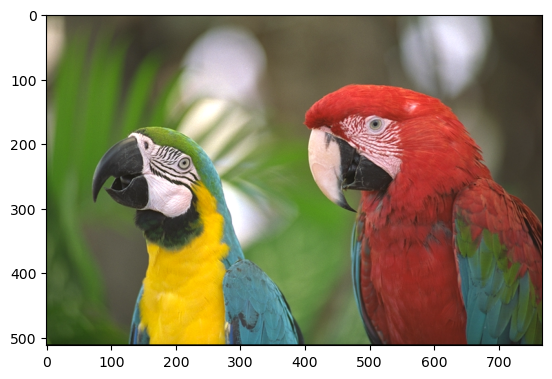

In [34]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-121..179].


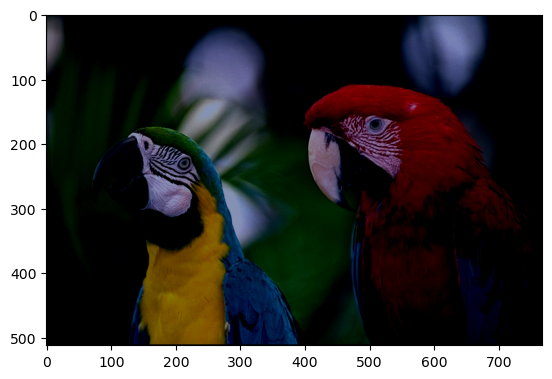

In [ ]:
#Part A and B
means = img.mean((0,1))

zero_mean = img - means
# zero_mean = (img - means) * 255
# zero_mean = zero_mean.astype(np.int64) 

plt.imshow(zero_mean)

In [36]:
#Part c
#Flattening out the channels
img_flat = zero_mean.reshape((-1,3))


cov_matrix = np.cov(img_flat,rowvar=0)

cov_matrix

array([[3253.83679291, 1772.47119851, 1285.68190501],
       [1772.47119851, 2539.17585598, 1719.95112533],
       [1285.68190501, 1719.95112533, 2835.31993872]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-262.17315327874684..177.32377989718117].


[6070.21157109 1758.73484564  799.38617089] 
 [[-0.61029924 -0.7155893   0.33980405]
 [-0.57286172  0.10240259 -0.81323008]
 [-0.54714193  0.69097443  0.47242994]]


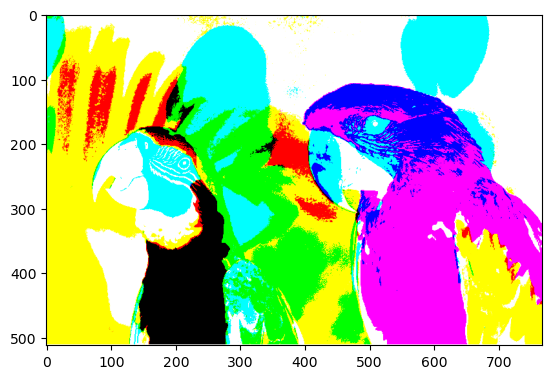

In [37]:
#Parts d,e,f
eigvals,eigvecs = np.linalg.eig(cov_matrix)

print(eigvals,"\n",eigvecs)
kl_transformed = np.dot(img_flat,eigvecs).reshape(img.shape)

plt.imshow(kl_transformed)

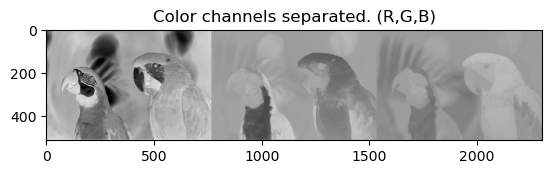

In [38]:
#Part g
channels = np.dsplit(kl_transformed,3)
# channels = [np.pad(image.squeeze(),10) for image in channels]
images = np.hstack(channels)
plt.title("Color channels separated. (R,G,B)")
plt.imshow(images,cmap="gray")

In [39]:
#Part h
cov_matrix_2 = np.cov(kl_transformed.reshape(-1,3),rowvar=0)
cov_matrix_2

print("Covariance matrix:\n",cov_matrix_2,"\n")

vars = np.diag(cov_matrix_2)

print("Difference between variance values and eigenvalues:",(vars - eigvals).mean())
# plt.heatmap
# np.cov(kl_transformed)
print("The value is practically zero. It is only non-zero due to floating point rounding errors")

Covariance matrix:
 [[ 6.07021157e+03  1.63388422e-09 -5.27910261e-09]
 [ 1.63388422e-09  1.75873485e+03 -6.28560524e-09]
 [-5.27910261e-09 -6.28560524e-09  7.99386171e+02]] 

Difference between variance values and eigenvalues: 4.000260863297929e-10
The value is practically zero. It is only non-zero due to floating point rounding errors
